In [139]:
import keras
import numpy as np
import sklearn.svm
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt



In [140]:
from keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()

In [145]:
trainX=trainX.reshape(trainX.shape[0],-1)
testX=testX.reshape(testX.shape[0],-1)
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

In [146]:
trainY.ravel()

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [172]:
classifier = sklearn.svm.LinearSVC(penalty='l1', loss='squared_hinge',
                                   dual=False, tol=0.0001, C=1.0, multi_class='ovr',
                                   fit_intercept=True, intercept_scaling=1,
                                   class_weight=None, verbose=0, random_state=None, max_iter=1000)
classifier.fit(trainX, trainY.ravel())

LinearSVC(dual=False, penalty='l1')

In [174]:
result=classifier.predict(testX)
num = result.shape[0]
count = 0
for i in range(num):
    if (result[i] == testY[i]):
        count+=1
res = (count/num) * 100    
print("точность: "+str(res)+"%")

точность: 89.62%


In [175]:
trainCX = trainX.reshape(trainX.shape[0],28,28)
testCX = testX.reshape(testX.shape[0],28,28)
testX.shape[0]


10000

In [176]:
def manualcheck(number):
    if (number>=10000):
        return "выход за пределы"
    plt.figure(2, figsize=(4, 4))
    plt.imshow(testCX[number], cmap=pyplot.get_cmap('gray'))
    plt.show()
    return "Правильное значение:" + str(testY[number]) + "; Предсказанно:"+str(result[number])

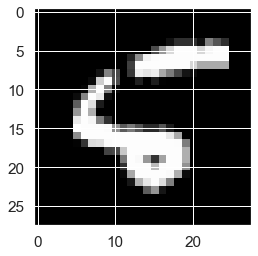

'Правильное значение:5; Предсказанно:6'

In [201]:
manualcheck(8)

In [178]:
confmatr = sklearn.metrics.confusion_matrix(testY, result, labels=None, sample_weight=None, normalize=None)

In [179]:
confmatr

array([[ 958,    2,    1,    0,    1,    5,    9,    2,    2,    0],
       [   0, 1106,    3,    2,    1,    1,    4,    2,   16,    0],
       [  16,   21,  878,   15,   16,    1,   18,   21,   33,   13],
       [   6,    1,   20,  898,    1,   31,    6,   13,   21,   13],
       [   3,    9,    3,    1,  885,    1,   16,    2,    9,   53],
       [  14,    4,    1,   45,   12,  737,   28,   13,   26,   12],
       [  11,    4,    3,    0,   17,   15,  902,    2,    4,    0],
       [   6,   21,   24,    5,    7,    2,    1,  930,    1,   31],
       [  12,   21,   10,   18,   18,   32,   23,   16,  808,   16],
       [  11,   12,    7,   17,   57,    9,    1,   25,   10,  860]],
      dtype=int64)

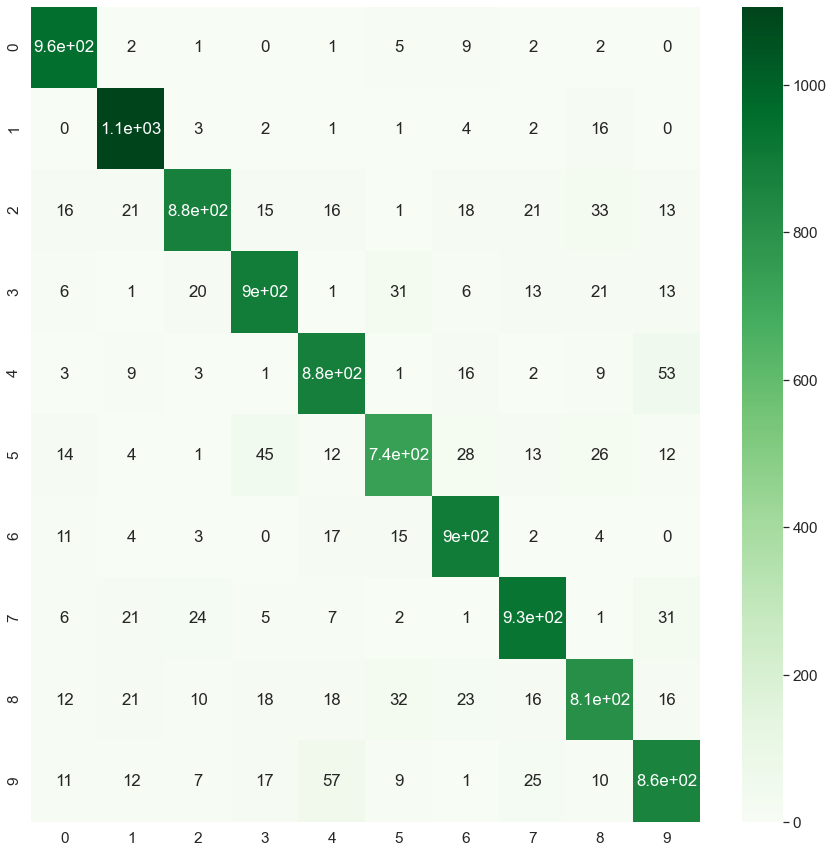

In [182]:

df = pd.DataFrame(confmatr, range(10), range(10))

plt.figure(figsize=(15,15))
sn.heatmap(df, annot=True, cmap='Greens') 

plt.show()